In [8]:
pip install scikit-learn


  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------------- -------------------- 4.2/8.7 MB 24.4 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 33.3 MB/s eta 0:00:00
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   -------------- ------------------------- 14.2/38.5 MB 70.9 MB/s eta 0:00:01
   -------------------------------- ------- 31.7/38.5 MB 79.4 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 69.3 MB/s eta 0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report

In [5]:
# Import Dataset
df=pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


Bộ dữ liệu này chứa 45.000 bản ghi về người đăng ký vay vốn, với nhiều thuộc tính khác nhau liên quan đến thông tin nhân khẩu học cá nhân, tình hình tài chính và chi tiết khoản vay. Bộ dữ liệu này có thể được sử dụng cho mô hình hóa dự đoán, đặc biệt trong việc đánh giá rủi ro tín dụng và dự đoán khả năng vỡ nợ.

Nội dung bộ dữ liệu

Bộ dữ liệu bao gồm 14 cột đại diện cho các yếu tố khác nhau ảnh hưởng đến việc phê duyệt và vỡ nợ khoản vay:

Thông tin cá nhân

person_age: Tuổi của người đăng ký (tính bằng năm). person_gender: Giới tính của người đăng ký (nam, nữ). person_education: Trình độ học vấn (Trung học, Cử nhân, Thạc sĩ, v.v.). person_income: Thu nhập hàng năm của người đăng ký (bằng đô la Mỹ). person_emp_exp: Số năm kinh nghiệm làm việc. person_home_ownership: Loại hình sở hữu nhà (THUÊ, SỞ HỮU, TRẢ GÓP). Chi tiết khoản vay

loan_amnt: Số tiền vay yêu cầu (bằng đô la Mỹ). loan_intent: Mục đích vay (CÁ NHÂN, GIÁO DỤC, Y TẾ, v.v.). loan_int_rate: Lãi suất cho khoản vay (tỷ lệ phần trăm). loan_percent_income: Tỷ lệ giữa số tiền vay và thu nhập. Lịch sử tín dụng & vay

cb_person_cred_hist_length: Thời gian lịch sử tín dụng của người đăng ký (tính bằng năm). credit_score: Điểm tín dụng của người đăng ký. previous_loan_defaults_on_file: Người đăng ký đã từng có tiền sử vỡ nợ hay chưa (Có hoặc Không). Biến mục tiêu

loan_status: 1 nếu khoản vay được trả thành công, 0 nếu người đăng ký vỡ nợ.

EDA (Exploratory Data Analysis): phân tích khám phá dữ liệu trước khi xây dựng mô hình

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Không có giá trị null

In [ ]:
df.describe() #tạo ra thống kê mô tả (descriptive statistics) cho dữ liệu trong DataFrame


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [8]:
# Gọi tên biến Target
tar_column='loan_status'

Text(0.5, 1.0, 'Biểu đồ tròn')

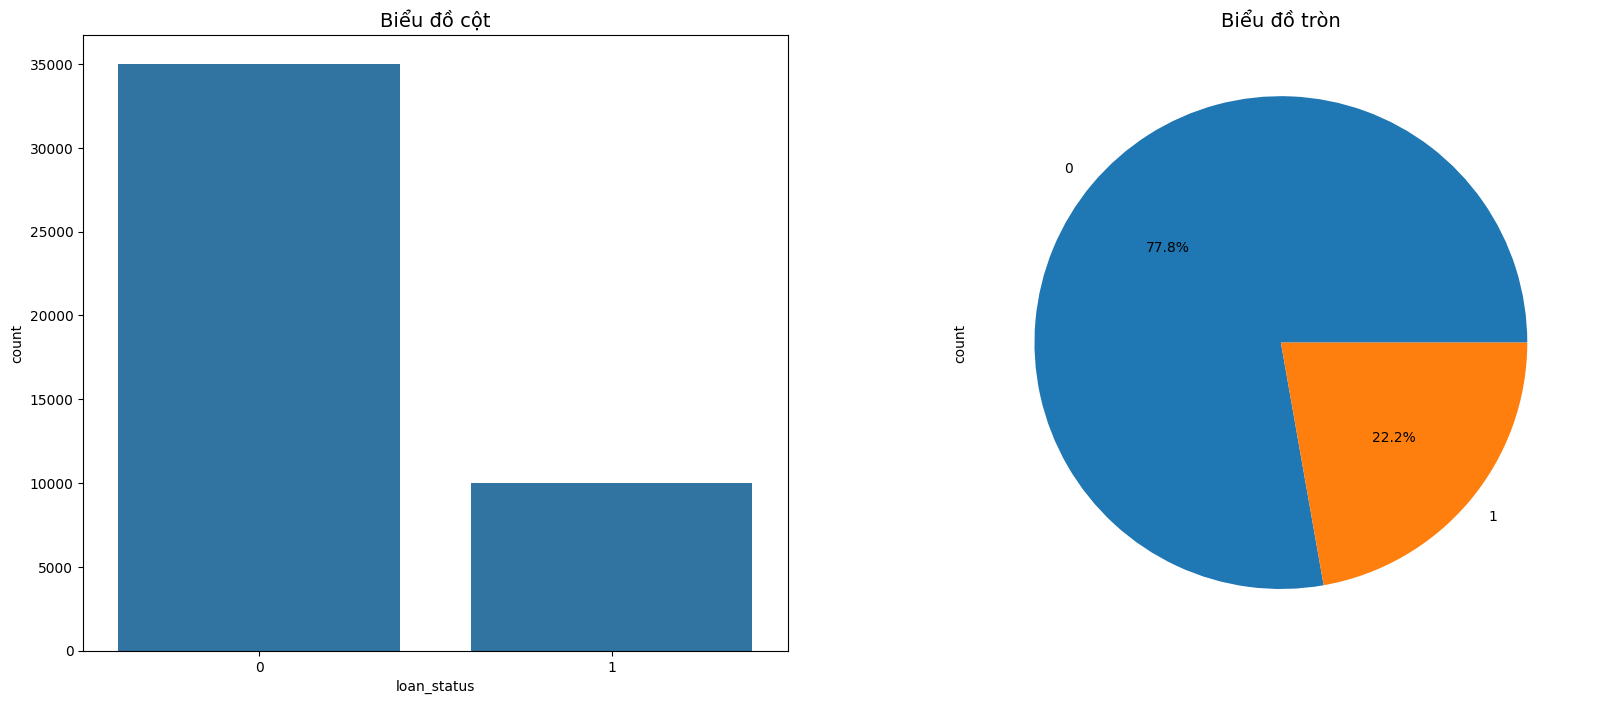

In [9]:
# Dùng biểu đồ tròn và cột để xem phân bố giá trị trong cột target
f, ax = plt.subplots(ncols= 2, figsize=(20,8))

sns.countplot(x=tar_column, data=df,ax=ax[0])
ax[0].set_title("Biểu đồ cột", fontsize=14)
df[tar_column].value_counts().plot(kind='pie', autopct='%.1f%%', ax=ax[1])
ax[1].set_title("Biểu đồ tròn", fontsize=14)

Explore Num cols & Cat cols(phân tích cột dữ liệu số và dữ liệu phân loại/ dạng nhãn)

In [11]:
# Tạo List gọi tên tất cả các cột
All_cols=df.columns.tolist()[:-1] # Bỏ đi cột Tar

In [12]:
All_cols

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file']

In [13]:
# Lập biến list chứa các cột Numeric và Object
Num_col=df.select_dtypes('number').columns.tolist()[:-1] # Bỏ target column
Cat_col=df.select_dtypes('object').columns.tolist()

In [14]:
Num_col

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [15]:
Cat_col

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [16]:
# Xem mỗi cột cat_cols có bao nhiêu phần tử độc lập
for col in Cat_col:
  print(f'{col}: {df[col].nunique()}')

person_gender: 2
person_education: 5
person_home_ownership: 4
loan_intent: 6
previous_loan_defaults_on_file: 2


In [ ]:
df[Cat_col] #lọc DataFrame để chỉ lấy các cột phân loại

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


Vizualize The Numeric Col

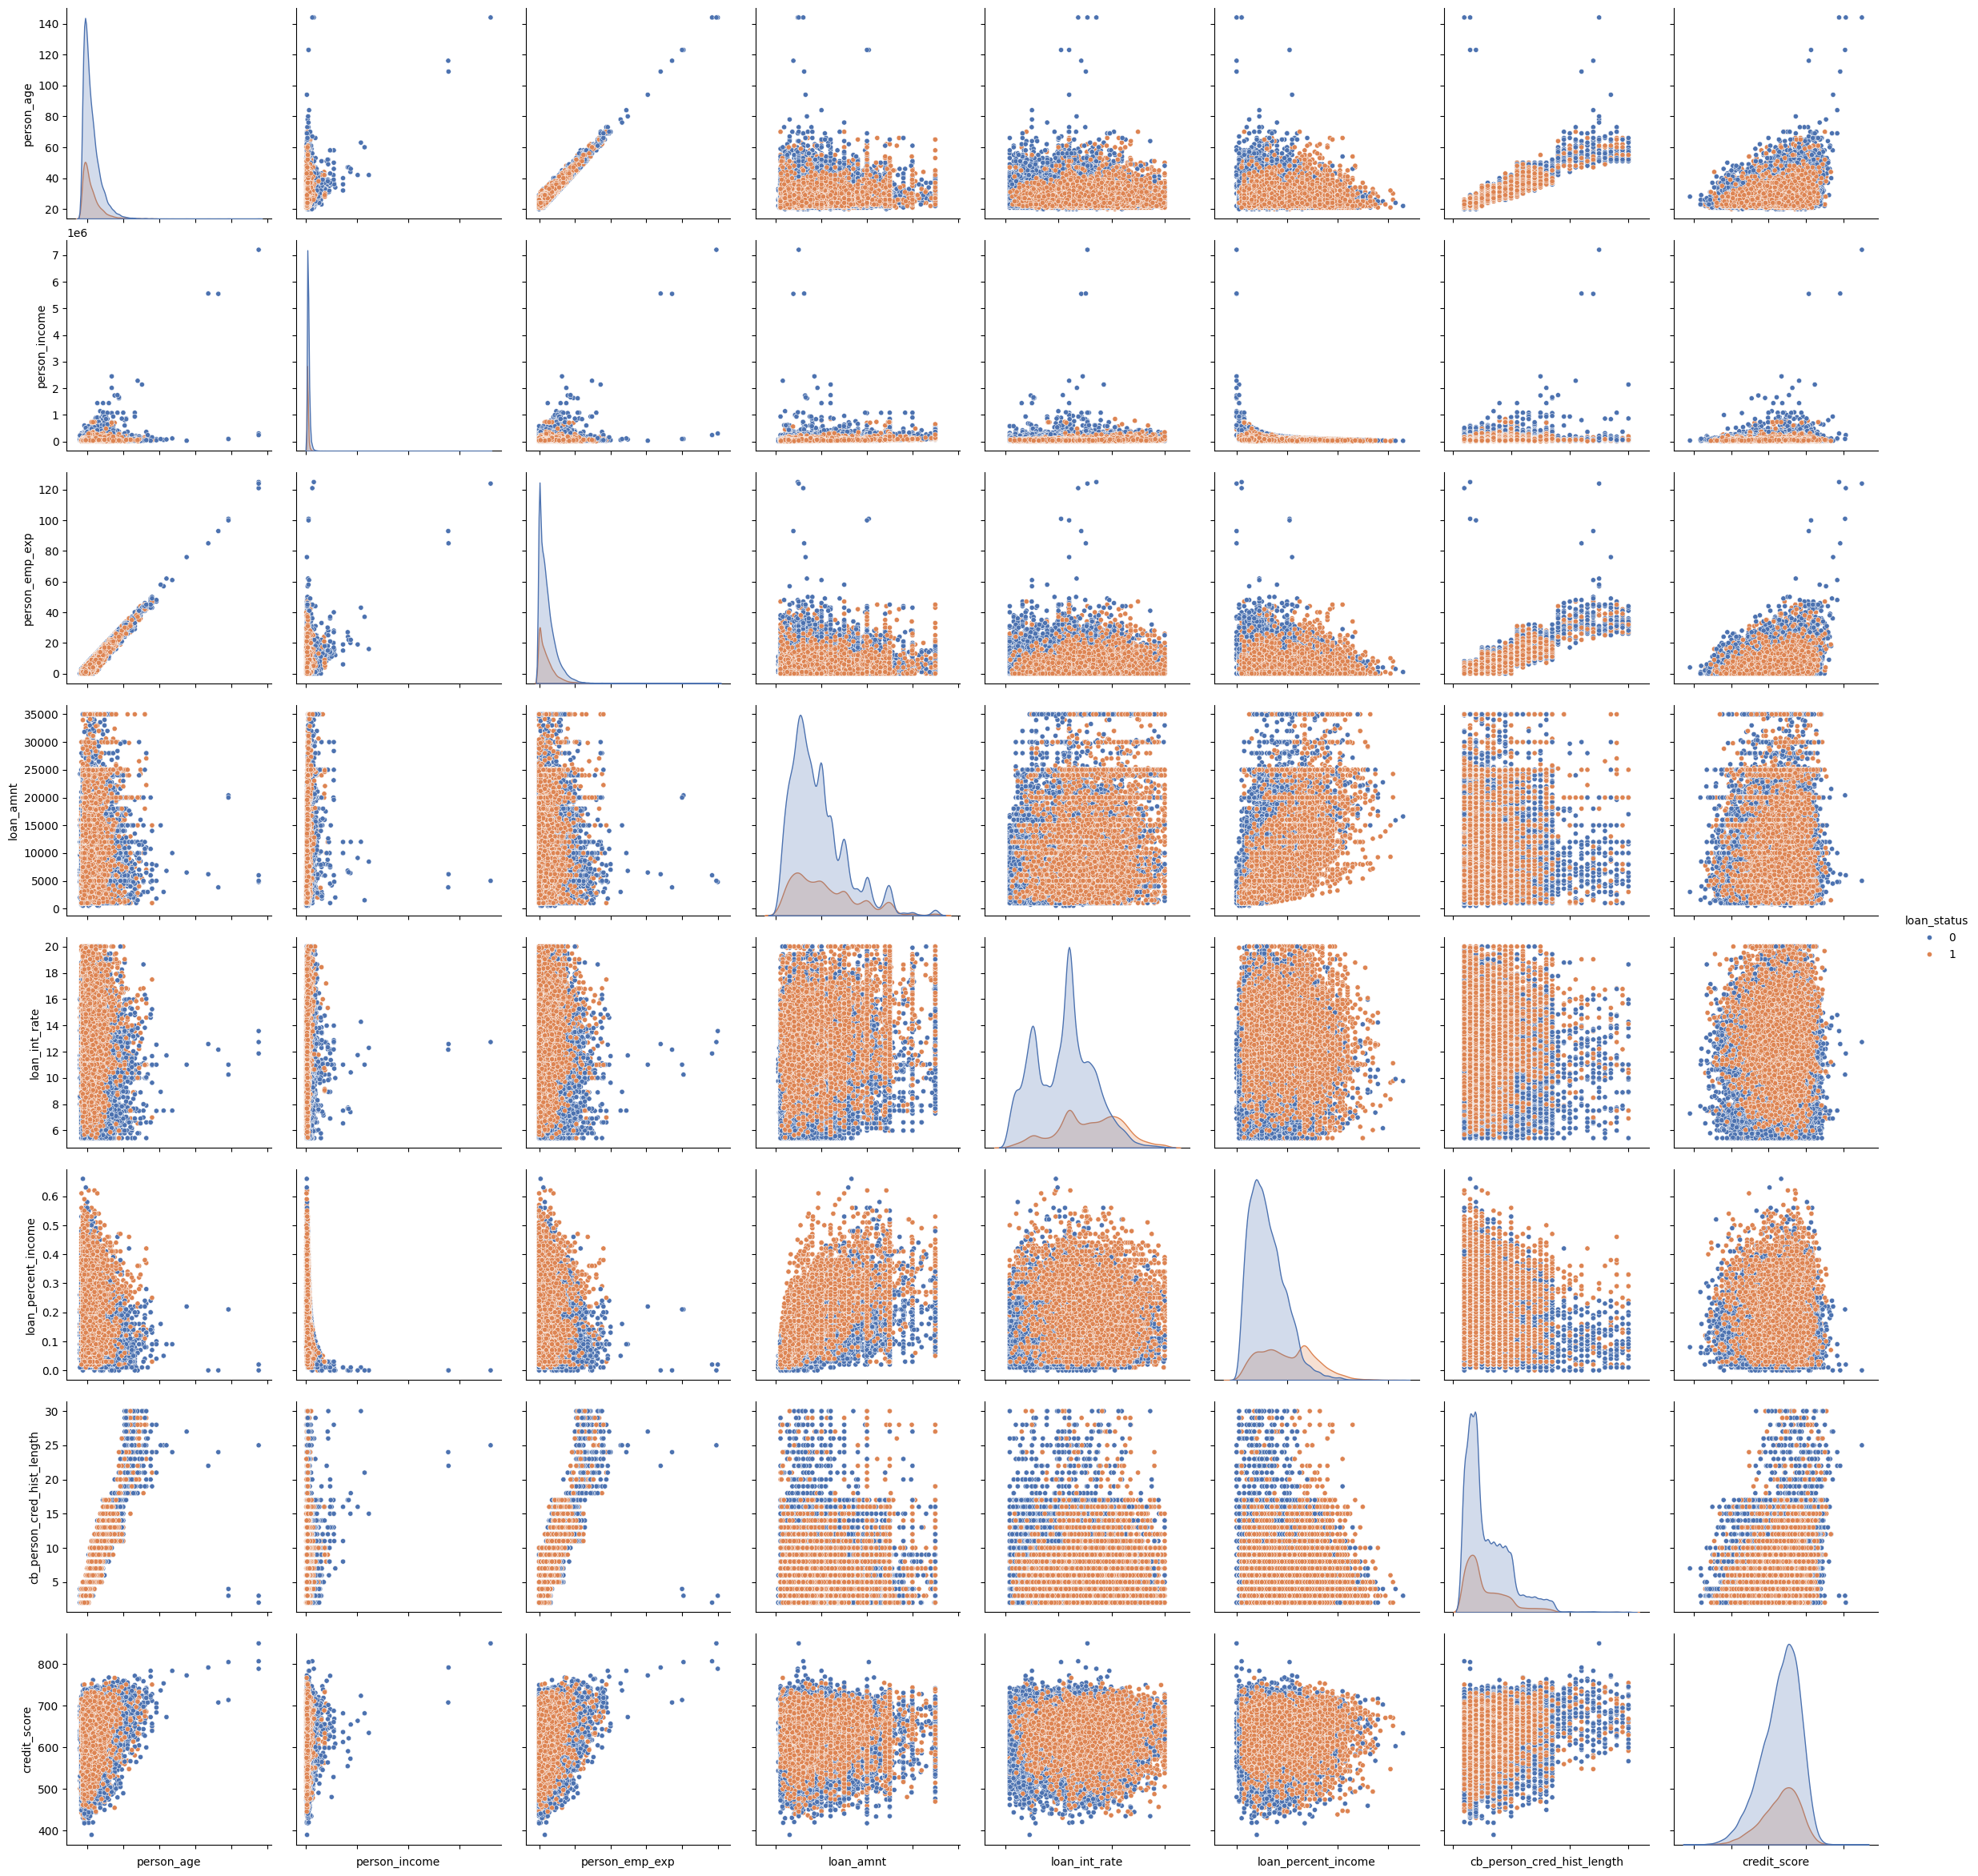

In [18]:
#Vizuallize all feature vs each other
pp = sns.pairplot(df[Num_col + [tar_column]],
                 hue=tar_column,
                 palette='deep',
                 height=3,
                 diag_kind='kde',
                 diag_kws=dict(fill=True),
                 plot_kws=dict(s=20))

pp.set(xticklabels=[])
plt.show()

Check Outiler Value: kiểm tra các giá trị có điểm khác biệt lớn trong data set, dưới đây sử dụng phương pháp boxlot

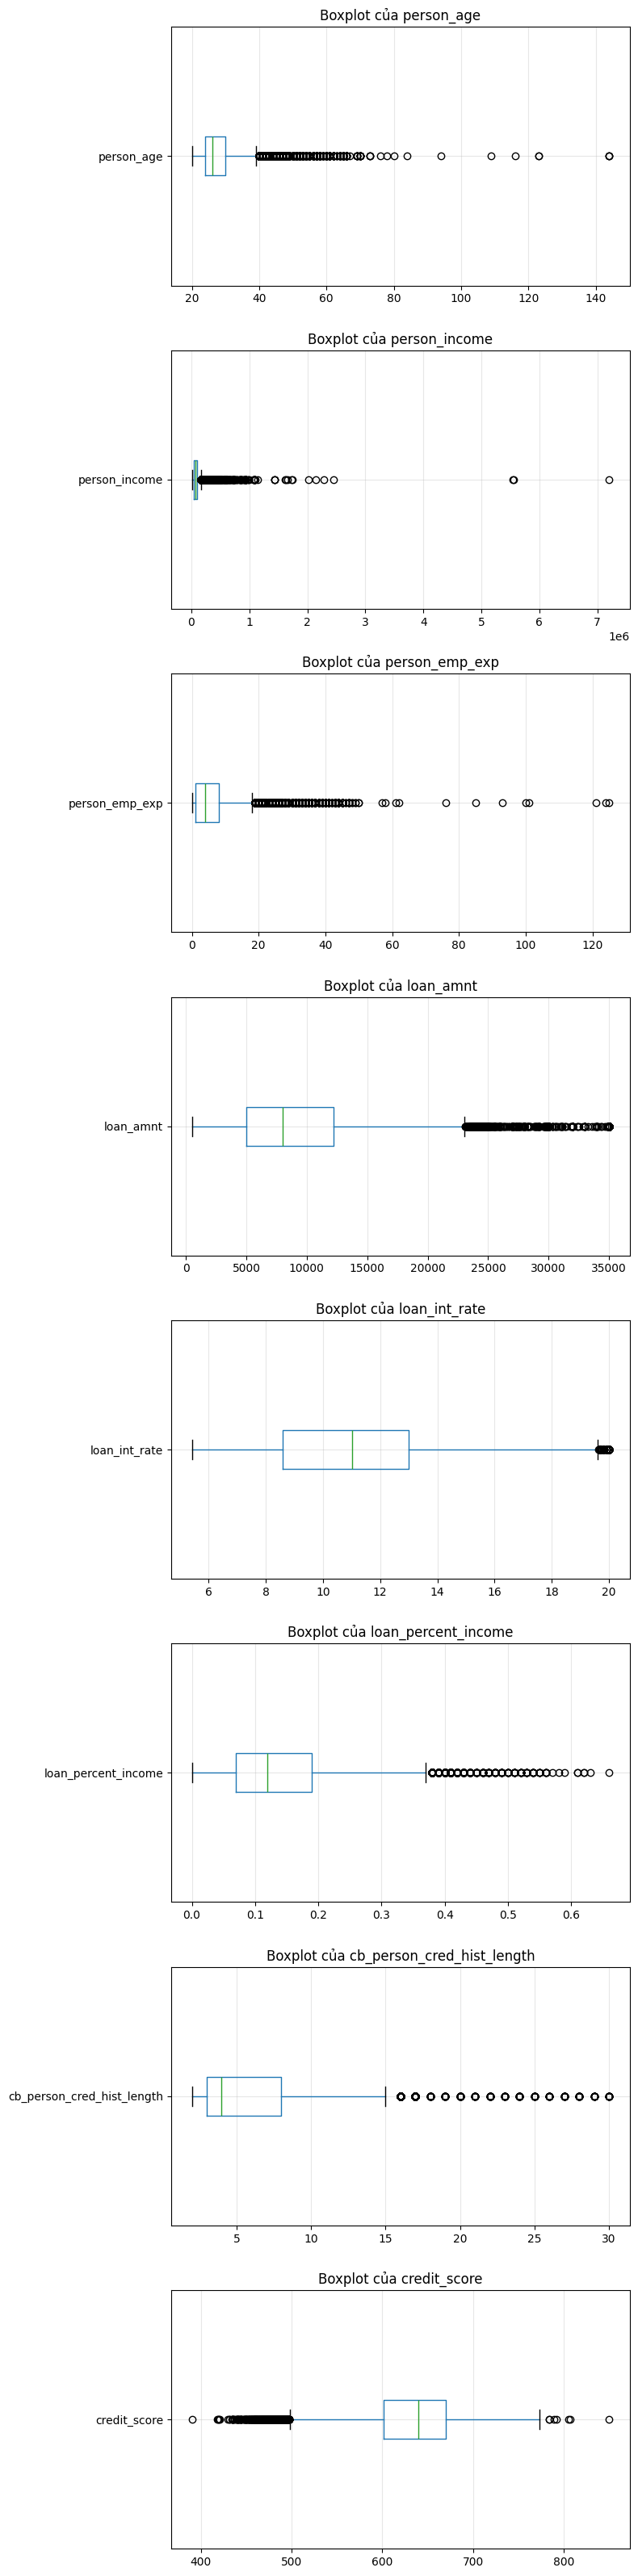

In [19]:
def plot_boxplots(df, numeric_columns):
    # Tạo figure với số subplot = số cột
    n = len(numeric_columns)
    fig, axes = plt.subplots(nrows=n, figsize=(8, 4*n))  # Kích thước tự điều chỉnh

    # Vẽ từng boxplot
    for i, col in enumerate(numeric_columns):
        df.boxplot(column=col, ax=axes[i], vert=False)  # vert=False để vẽ ngang
        axes[i].set_title(f"Boxplot của {col}", fontsize=12)
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()  # Tự động căn chỉnh khoảng cách
    plt.show()

# Gọi hàm
plot_boxplots(df, Num_col)

In [20]:
# Check skew đo lường mức độ bất đối xứng của phân phối dữ liệu 
# so với phân phối chuẩn (normal distribution).
from scipy.stats import skew
skewness = skew(df[Num_col])
skewness

array([ 2.54806907, 34.1364452 ,  2.59483087,  1.17969196,  0.21377695,
        1.03447767,  1.63166556, -0.61024049])

Correlation Matrix For Num_col: xác định mối quan hệ giữa các biến số (numeric columns) trong dataset

In [21]:
corr_matrix = df[Num_col + [tar_column]].corr()

<Axes: >

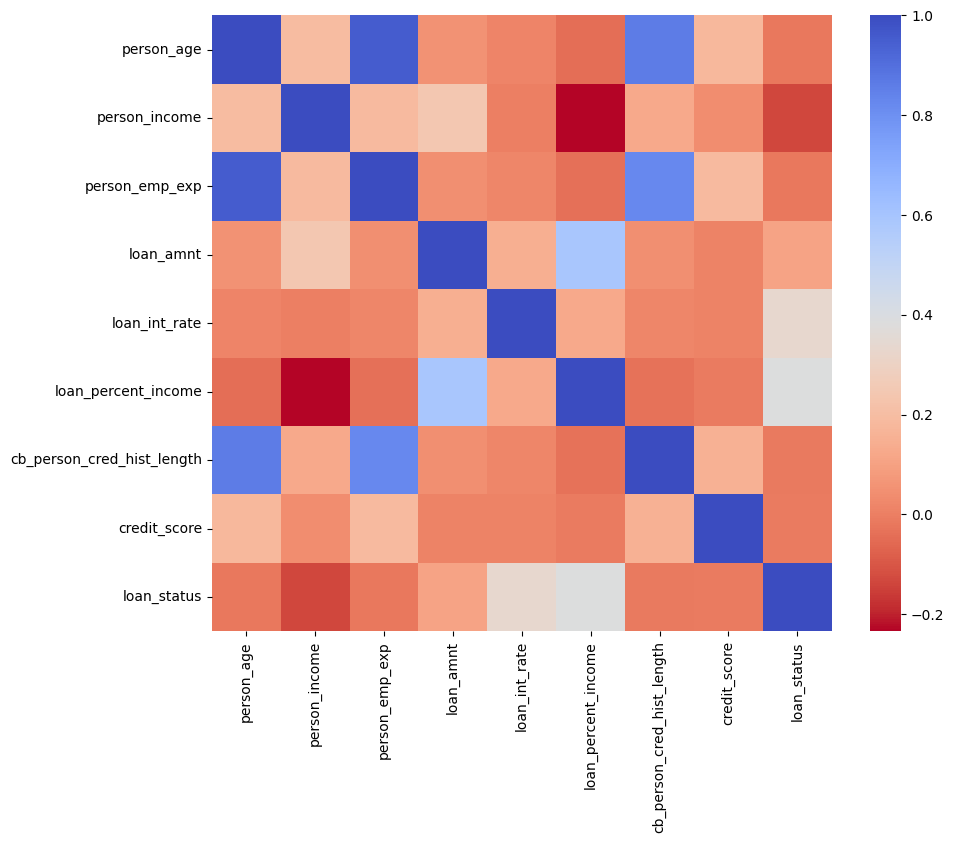

In [22]:
f, ax1 = plt.subplots(1, 1, figsize=(10,8))

sns.heatmap(corr_matrix, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)

In [ ]:
corr_matrix[tar_column].sort_values() 
#xem mức độ tương quan của tất cả các biến số (numeric features) 
#với một cột mục tiêu (tar_column)

person_income                -0.135808
person_age                   -0.021476
person_emp_exp               -0.020481
cb_person_cred_hist_length   -0.014851
credit_score                 -0.007647
loan_amnt                     0.107714
loan_int_rate                 0.332005
loan_percent_income           0.384880
loan_status                   1.000000
Name: loan_status, dtype: float64

2. Data Preprocessing: Xử lý dữ liệu

Label Encolding

In [ ]:
df[Cat_col][:20] 
#lấy ra dữ liệu của các cột dạng danh mục (categorical columns) 
# và hiển thị 20 dòng đầu tiên của DataFrame trong pandas

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
5,female,High School,OWN,VENTURE,No
6,female,Bachelor,RENT,EDUCATION,No
7,female,High School,RENT,MEDICAL,No
8,female,Associate,RENT,PERSONAL,No
9,female,High School,OWN,VENTURE,No


In [25]:
# Xem mỗi cột cat_cols có bao nhiêu phần tử độc lập
for col in Cat_col:
  print(f'{col}: {df[col].nunique()}')

person_gender: 2
person_education: 5
person_home_ownership: 4
loan_intent: 6
previous_loan_defaults_on_file: 2


In [26]:
from sklearn.preprocessing import LabelEncoder

In [29]:
# Áp dụng Label Encoder cho df[Cat_col]
le=LabelEncoder()
for col in Cat_col:
  df[col]=le.fit_transform(df[col])

In [30]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [31]:
# Lấy giá trị của 1 Row
row_values = df.iloc[3].tolist()  # Trả về list giá trị của hàng đầu tiên
print(row_values)

[23.0, 0.0, 1.0, 79753.0, 0.0, 3.0, 35000.0, 3.0, 15.23, 0.44, 2.0, 675.0, 0.0, 1.0]
